<a href="https://colab.research.google.com/github/seiji0203/LSTM_-/blob/master/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [ ]:
start = '2019-07-01'
end = '2020-07-01'

df = data.DataReader('^NKX', 'stooq', start, end) 

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-01,22338.30,22360.26,22039.56,22121.73,673597200
2020-06-30,22335.10,22447.80,22279.31,22288.14,741689200
2020-06-29,22255.05,22281.38,21969.97,21995.04,737157500
2020-06-26,22424.37,22589.14,22409.55,22512.08,666387400
2020-06-25,22287.87,22423.41,22165.14,22259.79,808200600


In [ ]:
date=df.index
close = df['Close']

In [ ]:
# 移動平均を作成(加重移動平均と指数平滑移動平均は今回は作成しない)
span5 = 5 # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df['sma5'] = close.rolling(window=span5).mean()
df['sma25'] = close.rolling(window=span25).mean()
df['sma50'] = close.rolling(window=span50).mean()

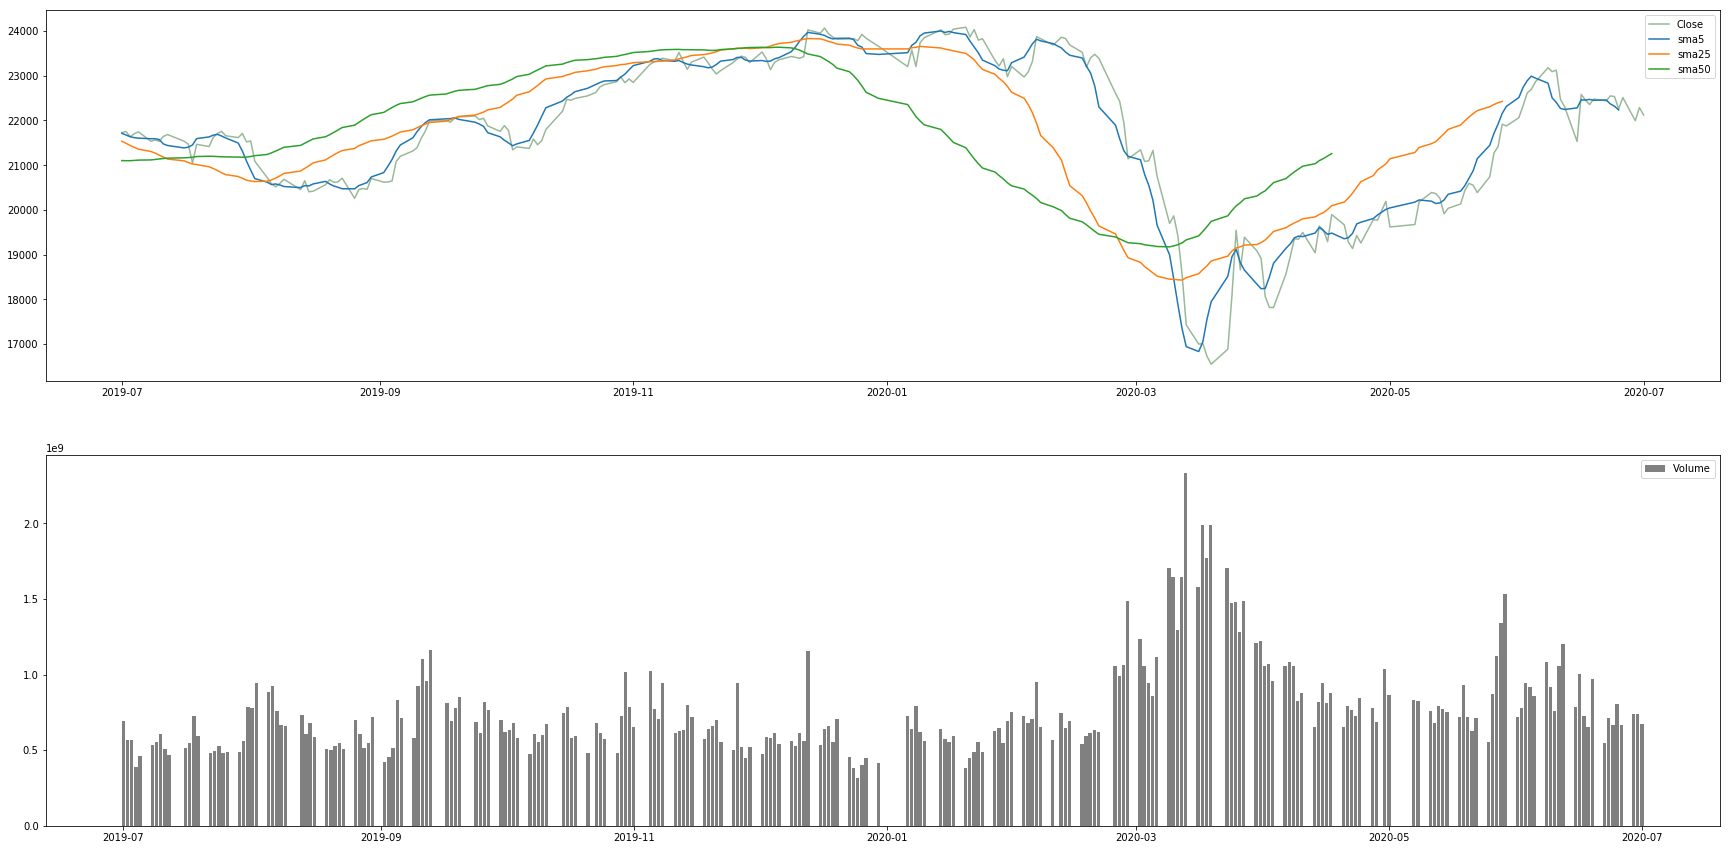

In [ ]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma5'],label='sma5')
plt.plot(date,df['sma25'],label='sma25')
plt.plot(date,df['sma50'],label='sma50')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [ ]:
# MACD（トレンドの指標を見る）
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist
Date,,,,,,,,,,,
2020-07-01,22338.30,22360.26,22039.56,22121.73,673597200,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,22335.10,22447.80,22279.31,22288.14,741689200,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29,22255.05,22281.38,21969.97,21995.04,737157500,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-26,22424.37,22589.14,22409.55,22512.08,666387400,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-25,22287.87,22423.41,22165.14,22259.79,808200600,22235.356,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist
Date,,,,,,,,,,,
2019-07-05,21700.28,21746.38,21647.73,21746.38,461633200,21604.578,21358.5804,21113.9350,144.049939,137.707370,6.342569
2019-07-04,21709.99,21713.66,21685.18,21702.45,389853800,21616.362,21399.2856,21107.9576,146.399242,139.445744,6.953498
2019-07-03,21684.07,21708.69,21566.82,21638.16,567018300,21637.298,21441.0780,21100.9550,141.442950,139.845185,1.597764
2019-07-02,21699.43,21784.22,21699.27,21754.27,564114500,21675.122,21490.5864,21100.8482,145.210266,140.918201,4.292064
2019-07-01,21566.27,21758.34,21559.17,21729.97,689817500,21714.246,21536.3728,21103.4924,144.568587,141.648279,2.920308


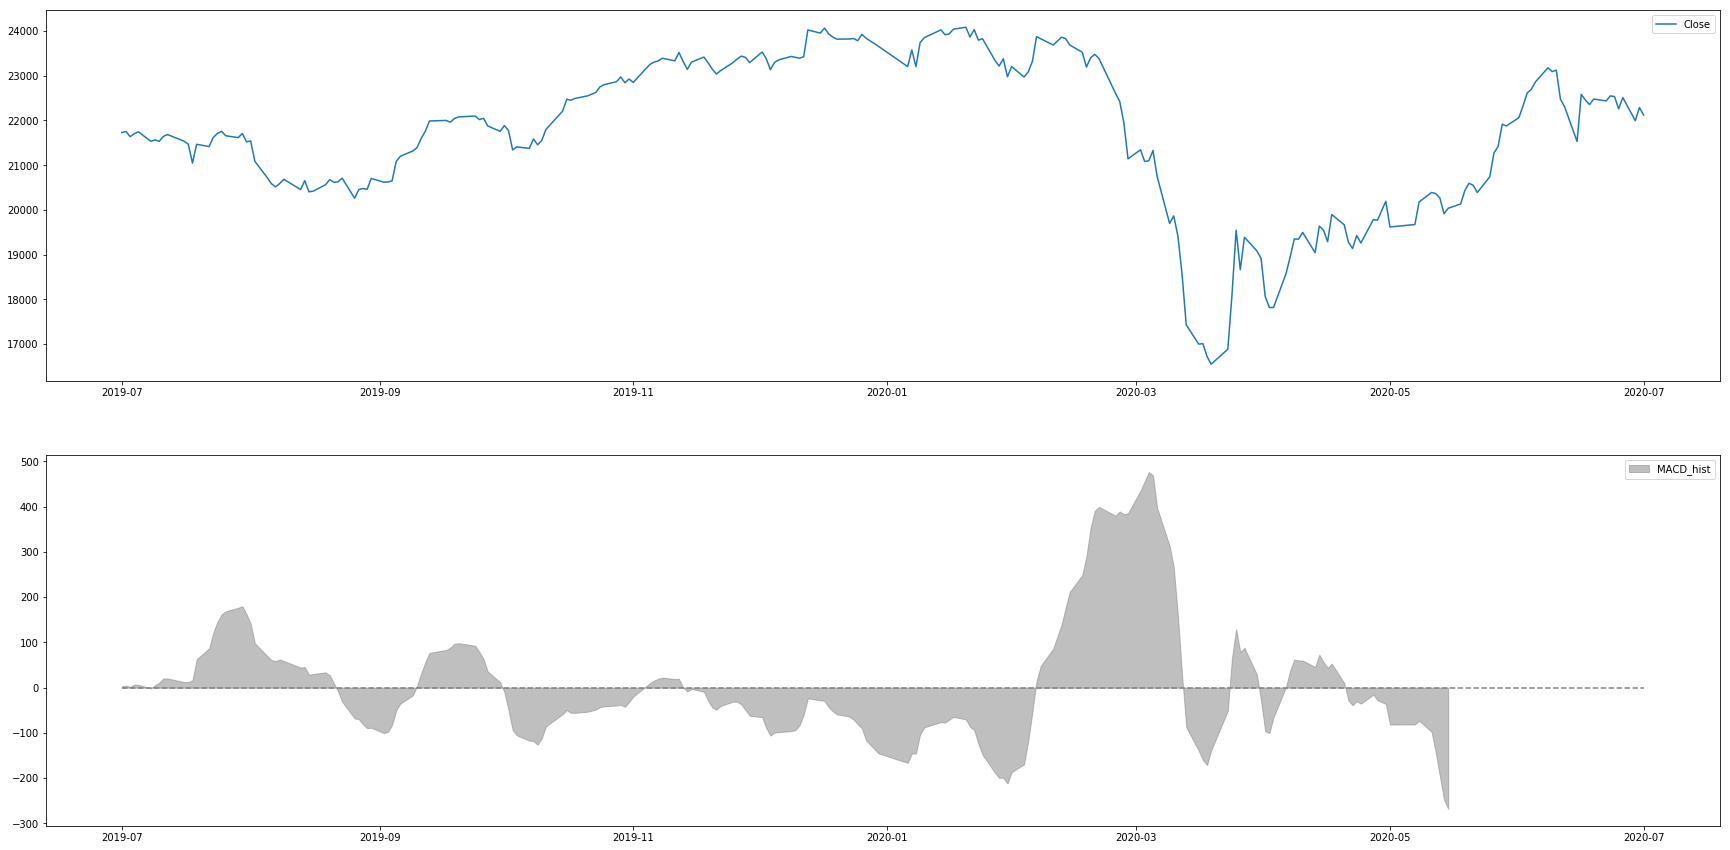

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date, close, label='Close')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha = 0.5, label='MACD_hist')
plt.hlines(0, start, end, "grey", linestyles="dashed")
plt.legend()

In [ ]:
# RSI（売られすぎ・買われすぎの判断材料）
df['RSI'] = ta.RSI(close, timeperiod=span25)

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,
2019-07-05,21700.28,21746.38,21647.73,21746.38,461633200,21604.578,21358.5804,21113.9350,144.049939,137.707370,6.342569,55.081928
2019-07-04,21709.99,21713.66,21685.18,21702.45,389853800,21616.362,21399.2856,21107.9576,146.399242,139.445744,6.953498,54.375251
2019-07-03,21684.07,21708.69,21566.82,21638.16,567018300,21637.298,21441.0780,21100.9550,141.442950,139.845185,1.597764,53.332185
2019-07-02,21699.43,21784.22,21699.27,21754.27,564114500,21675.122,21490.5864,21100.8482,145.210266,140.918201,4.292064,54.957682
2019-07-01,21566.27,21758.34,21559.17,21729.97,689817500,21714.246,21536.3728,21103.4924,144.568587,141.648279,2.920308,54.543514


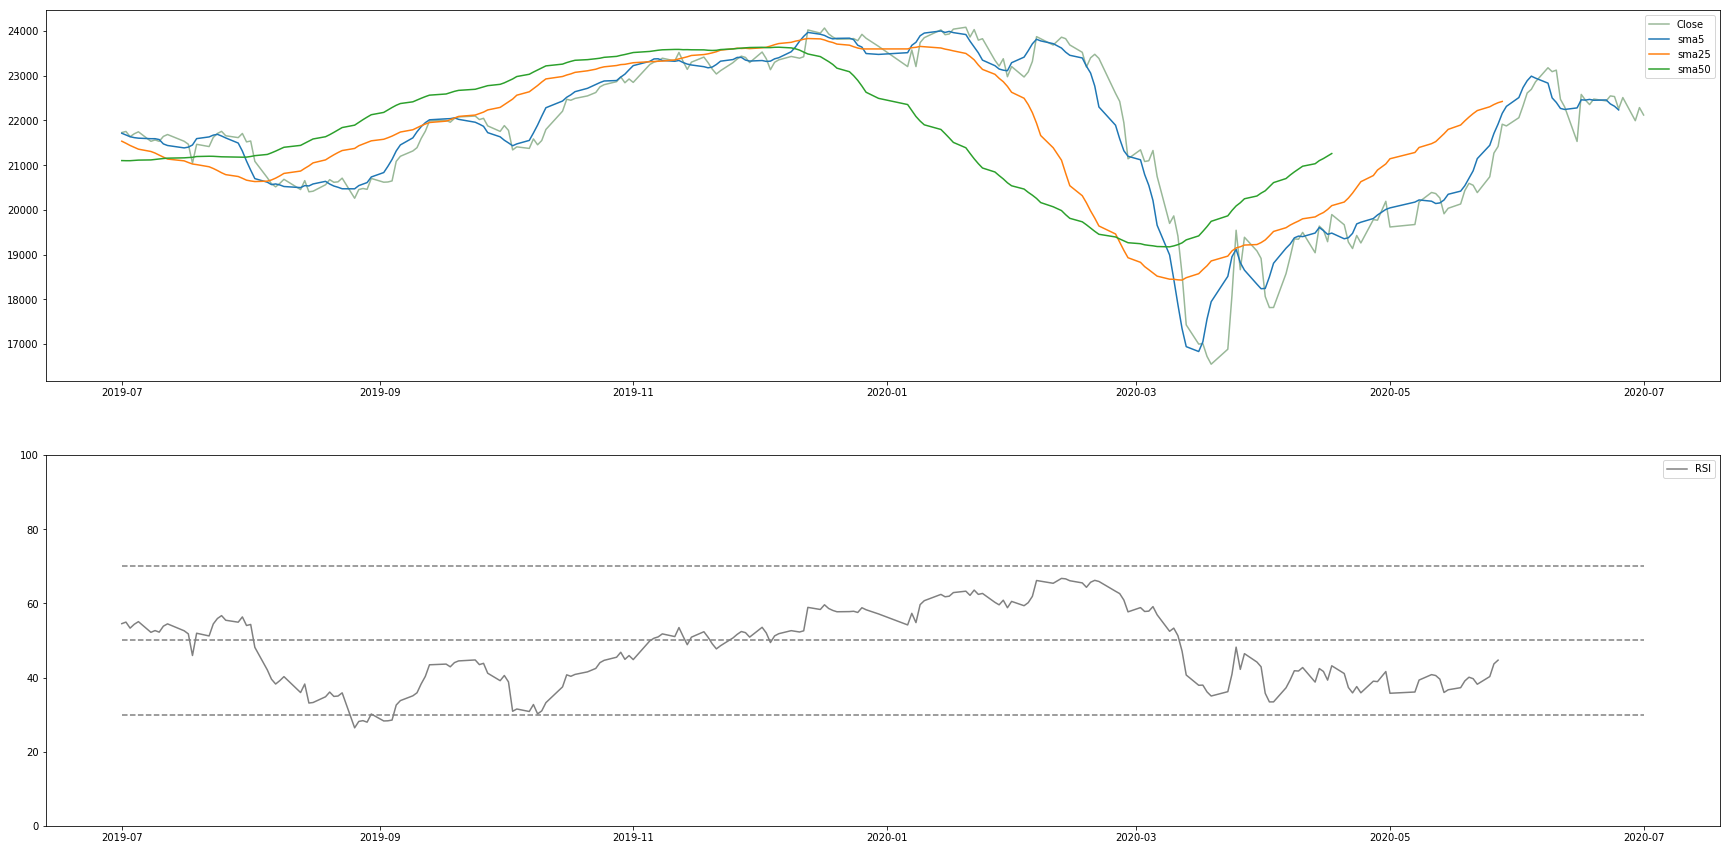

In [ ]:
plt.figure(figsize=(30, 15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma5'],label='sma5')
plt.plot(date,df['sma25'],label='sma25')
plt.plot(date,df['sma50'],label='sma50')
plt.legend()

plt.subplot(2,1,2)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], start, end, 'grey', linestyles='dashed')
plt.legend()

savename = 'RSI.png'
plt.savefig(savename, dpi=300)

In [ ]:
# ボリンジャーバンド（プラスナイナスの標準偏差の2倍を使用:基本的にはボリンジャーバンドに収まるが、治らない場合はRSI）
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span25, nbdevdn=2, matype=0)

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2019-07-05,21700.28,21746.38,21647.73,21746.38,461633200,21604.578,21358.5804,21113.9350,144.049939,137.707370,6.342569,55.081928,22170.118342,21358.5804,20547.042458
2019-07-04,21709.99,21713.66,21685.18,21702.45,389853800,21616.362,21399.2856,21107.9576,146.399242,139.445744,6.953498,54.375251,22172.753824,21399.2856,20625.817376
2019-07-03,21684.07,21708.69,21566.82,21638.16,567018300,21637.298,21441.0780,21100.9550,141.442950,139.845185,1.597764,53.332185,22145.685182,21441.0780,20736.470818
2019-07-02,21699.43,21784.22,21699.27,21754.27,564114500,21675.122,21490.5864,21100.8482,145.210266,140.918201,4.292064,54.957682,22095.238255,21490.5864,20885.934545
2019-07-01,21566.27,21758.34,21559.17,21729.97,689817500,21714.246,21536.3728,21103.4924,144.568587,141.648279,2.920308,54.543514,22021.411924,21536.3728,21051.333676


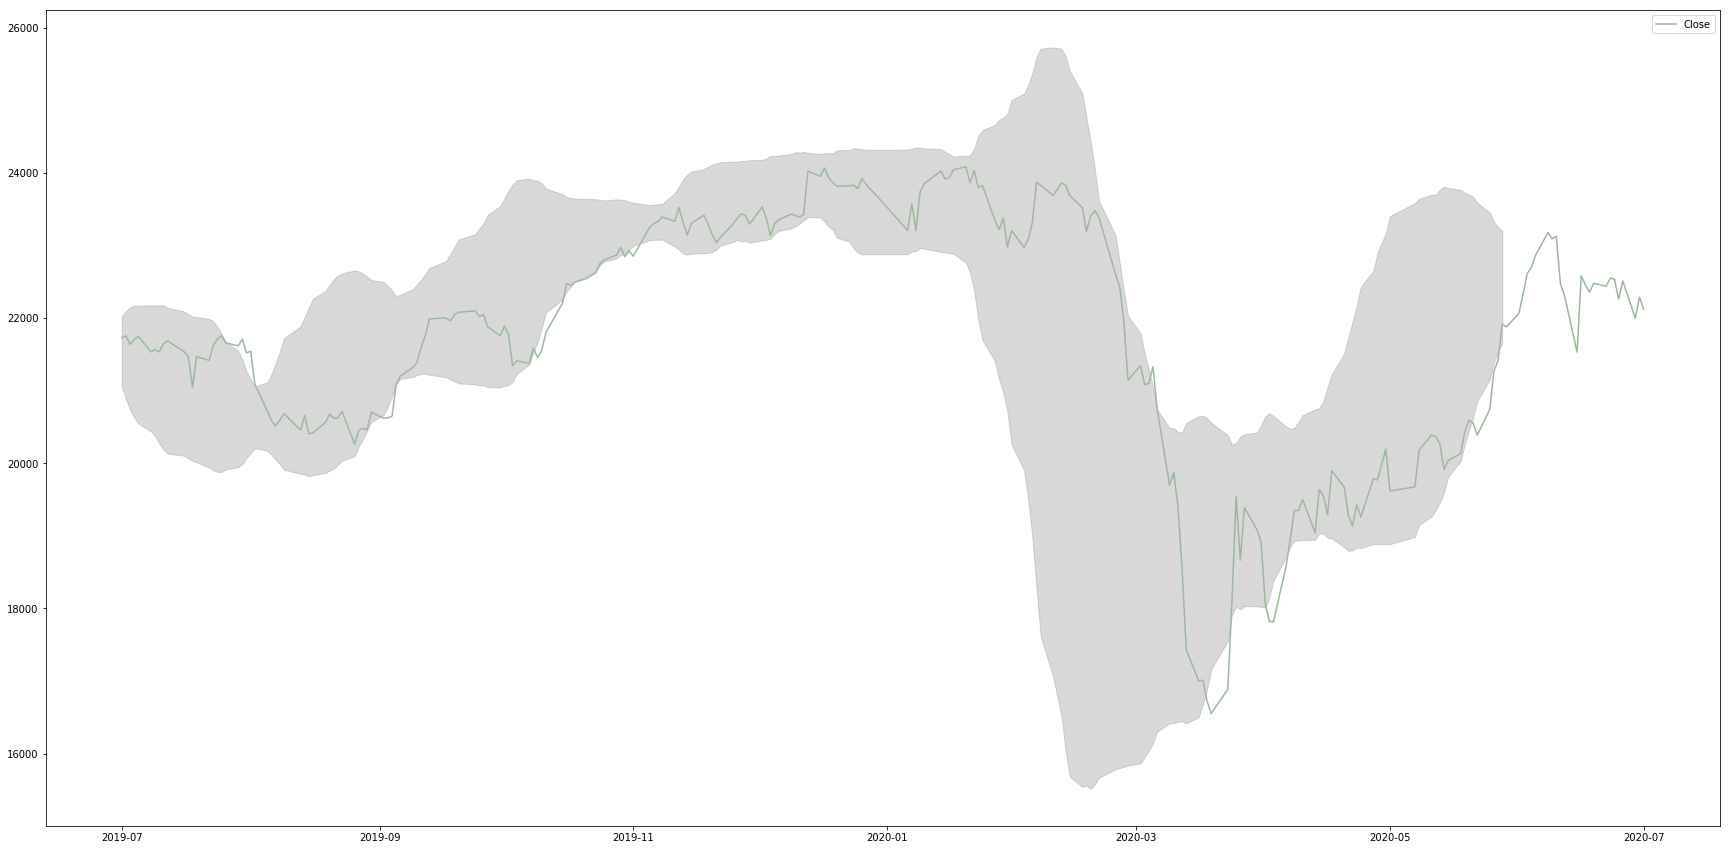

In [ ]:
plt.figure(figsize=(30, 15))

plt.plot(date, close, label = 'Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='grey', alpha=0.3)
plt.legend()

savename = 'BBANDS.png'
plt.savefig(savename, dpi=300)

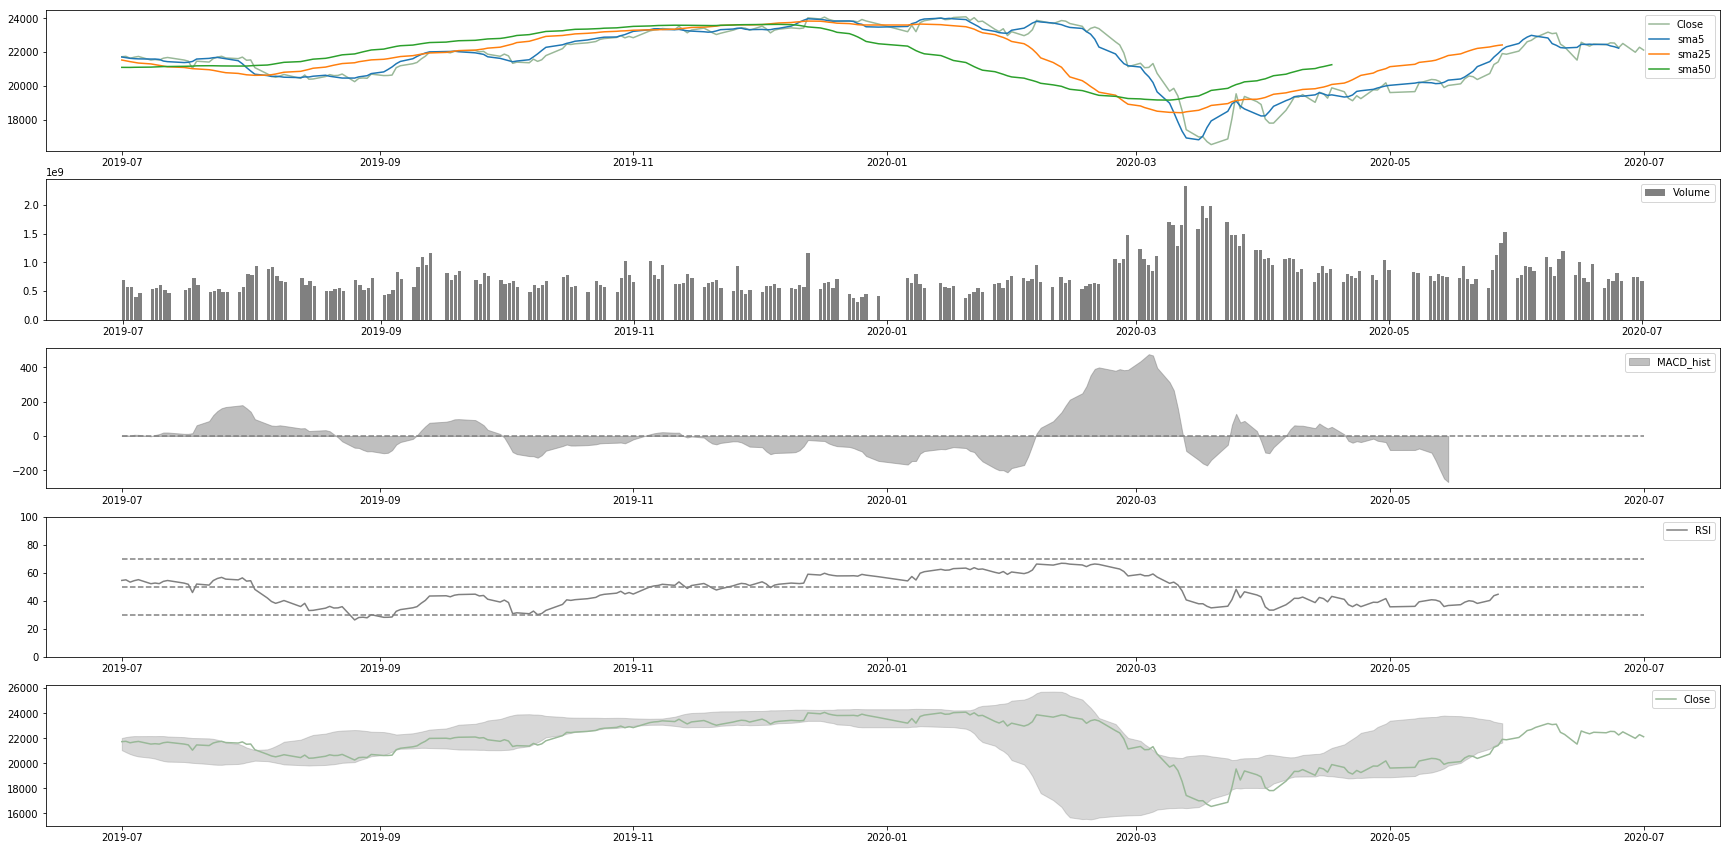

In [ ]:
plt.figure(figsize=(30, 15))
plt.subplot(5,1,1)

# 移動平均
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma5'],label='sma5')
plt.plot(date,df['sma25'],label='sma25')
plt.plot(date,df['sma50'],label='sma50')
plt.legend()

# 出来高
plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

# MACD
plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha = 0.5, label='MACD_hist')
plt.hlines(0, start, end, "grey", linestyles="dashed")
plt.legend()

# RSI
plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0, 100)
plt.hlines([30, 50, 70], start, end, 'grey', linestyles='dashed')
plt.legend()


# ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(date, close, label = 'Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='grey', alpha=0.3)
plt.legend()